# Import

In [1]:
%pip install matplotlib pyyaml

Note: you may need to restart the kernel to use updated packages.


In [2]:
from Loader import Animal, load_all, plot_raster, plot_contours, plot_velocity, traces
import numpy as np
%matplotlib inline
#%matplotlib tk
%autosave 180
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

Autosaving every 180 seconds


# Work Examples

## Loading

### Animals

In [4]:
# Root directory should be changed in Animal class too, if necessary
root_dir = r"\\toucan-all.scicore.unibas.ch\donafl00-calcium$\Users\Sergej\Steffen_Experiments\rodrigo"
#root_dir = r"D:\SwitchDrive\Gallegolab\Animal_binarization_20231130"
Animal.root_dir = root_dir
mice21 = ["DON-002865", "DON-003165", "DON-003343", "DON-006084", "DON-006085", "DON-006087"]
mice22 = ["DON-008497", "DON-008498", "DON-008499", "DON-009191", "DON-009192", "DON-010473", "DON-010477"]
mice23 = ["DON-014837", "DON-014838", "DON-014840", "DON-014847", "DON-014849", "DON-015078", "DON-015079",
          "DON-017115", "DON-017117", "DON-017118", "DON-019207", "DON-019210", "DON-019213", "DON-019542", 
          "DON-019545", "DON-019608", "DON-019609", "DON-019747", "DON-019748"]

In [5]:
# create animal and session objects and load metadata
# for mice with the id "DON-002865" and all sessions
wanted_animal_ids = ["DON-002865"]
animals = load_all(root_dir, wanted_animal_ids=wanted_animal_ids, wanted_session_ids=["all"], print_loading=True)

Added animal: DON-002865
Initialized session: DON-002865 20210210
Initialized session: DON-002865 20210211
Initialized session: DON-002865 20210212
Initialized session: DON-002865 20210213
Initialized session: DON-002865 20210214
Initialized session: DON-002865 20210215
Initialized session: DON-002865 20210216
Initialized session: DON-002865 20210217
Initialized session: DON-002865 20210218
Initialized session: DON-002865 20210219
Initialized session: DON-002865 20210220
Initialized session: DON-002865 20210222
Initialized session: DON-002865 20210223
Initialized session: DON-002865 20210224
Initialized session: DON-002865 20210225
Initialized session: DON-002865 20210226
Initialized session: DON-002865 20210227
Initialized session: DON-002865 20210228
Initialized session: DON-002865 20210301
Initialized session: DON-002865 20210302
Initialized session: DON-002865 20210303


### FPS

In [32]:
# example to load fps for every session for every mouse (stops after 1 session)
for animal_id, animal in animals.items():
    for session_id, session in animal.sessions.items():
        # load fps from session
        fps = session.load_fps()
        print(f"{animal_id} {session_id} fps: {fps}")
        print(f"{session.animal_id} {session.session_id} fps: {session.fps}")
        break
    break

DON-002865 20210210 fps: 30.966814176218747
DON-002865 20210210 fps: 30.966814176218747


### Fluoresence (Platform colored as gray)

In [7]:
# create animal and session objects and load metadata
# for mice from cohort 2021 and 2022 and all sessions
wanted_animal_ids = mice21+mice22+mice23
animals = load_all(root_dir, wanted_animal_ids=wanted_animal_ids, wanted_session_ids=["all"], print_loading=False)

In [9]:
animals["DON-002865"].sessions

{'20210210': <__main__.Session at 0x1d376927dc0>,
 '20210211': <__main__.Session at 0x1d376927520>,
 '20210212': <__main__.Session at 0x1d376927f10>,
 '20210213': <__main__.Session at 0x1d376927160>,
 '20210214': <__main__.Session at 0x1d376927940>,
 '20210215': <__main__.Session at 0x1d376927880>,
 '20210216': <__main__.Session at 0x1d3769270a0>,
 '20210217': <__main__.Session at 0x1d376927340>,
 '20210218': <__main__.Session at 0x1d376927be0>,
 '20210219': <__main__.Session at 0x1d3769271c0>,
 '20210220': <__main__.Session at 0x1d3769271f0>,
 '20210222': <__main__.Session at 0x1d376927040>,
 '20210223': <__main__.Session at 0x1d376927cd0>,
 '20210224': <__main__.Session at 0x1d3769272e0>,
 '20210225': <__main__.Session at 0x1d376927400>,
 '20210226': <__main__.Session at 0x1d376927220>,
 '20210227': <__main__.Session at 0x1d3769273a0>,
 '20210228': <__main__.Session at 0x1d376927fd0>,
 '20210301': <__main__.Session at 0x1d376927a00>,
 '20210302': <__main__.Session at 0x1d3769274f0>,


False 55740
True 92901


<Figure size 640x480 with 0 Axes>

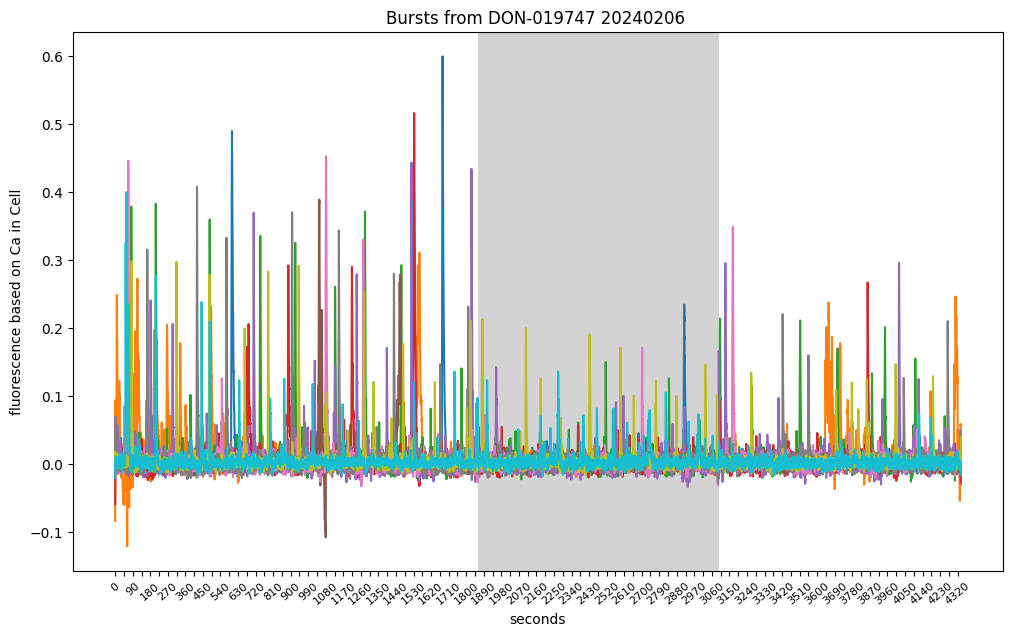

In [8]:
# plot fluoresence of 10 cells for 1 session of every mouse
session = animals["DON-019747"].sessions["20240206"]
# load fluoresence data
session.load_fluoresence(clean=True)
session.load_is_wheel()
traces(session.F_detrended, session.animal_id, session.session_id, num_cells=10, is_wheel=session.is_wheel)

### Velocities + is_wheel (Platform colored as gray)

In [5]:
root_dir = r"D:\SwitchDrive\Gallegolab\Animal_binarization_20240304"
Animal.root_dir = root_dir
wanted_animal_ids = ["DON-019747"]
animals = load_all(root_dir, wanted_animal_ids=wanted_animal_ids, wanted_session_ids=["all"], print_loading=True)

Added animal: DON-019747
Initialized session: DON-019747 20240129
Initialized session: DON-019747 20240131
Initialized session: DON-019747 20240201
Initialized session: DON-019747 20240202
Initialized session: DON-019747 20240203
Initialized session: DON-019747 20240204
Initialized session: DON-019747 20240205
Initialized session: DON-019747 20240206
Initialized session: DON-019747 20240207
Initialized session: DON-019747 20240208
Initialized session: DON-019747 20240209
Initialized session: DON-019747 20240210
Initialized session: DON-019747 20240211
Initialized session: DON-019747 20240212
Initialized session: DON-019747 20240213
Initialized session: DON-019747 20240214
Initialized session: DON-019747 20240215


In [6]:
session = animals["DON-019747"].sessions["20240206"]
velocity = session.load_velocity()
is_wheel = session.load_is_wheel()
if type(velocity)==np.ndarray:
    print(velocity.shape)
    print(is_wheel.shape, str(is_wheel[:10])[:-1]+" ...")
    print(session.underground)

(130062,)
(130062,) [ True  True  True  True  True  True  True  True  True  True ...
['wheel', 'platform', 'wheel']


False 55740
True 92901


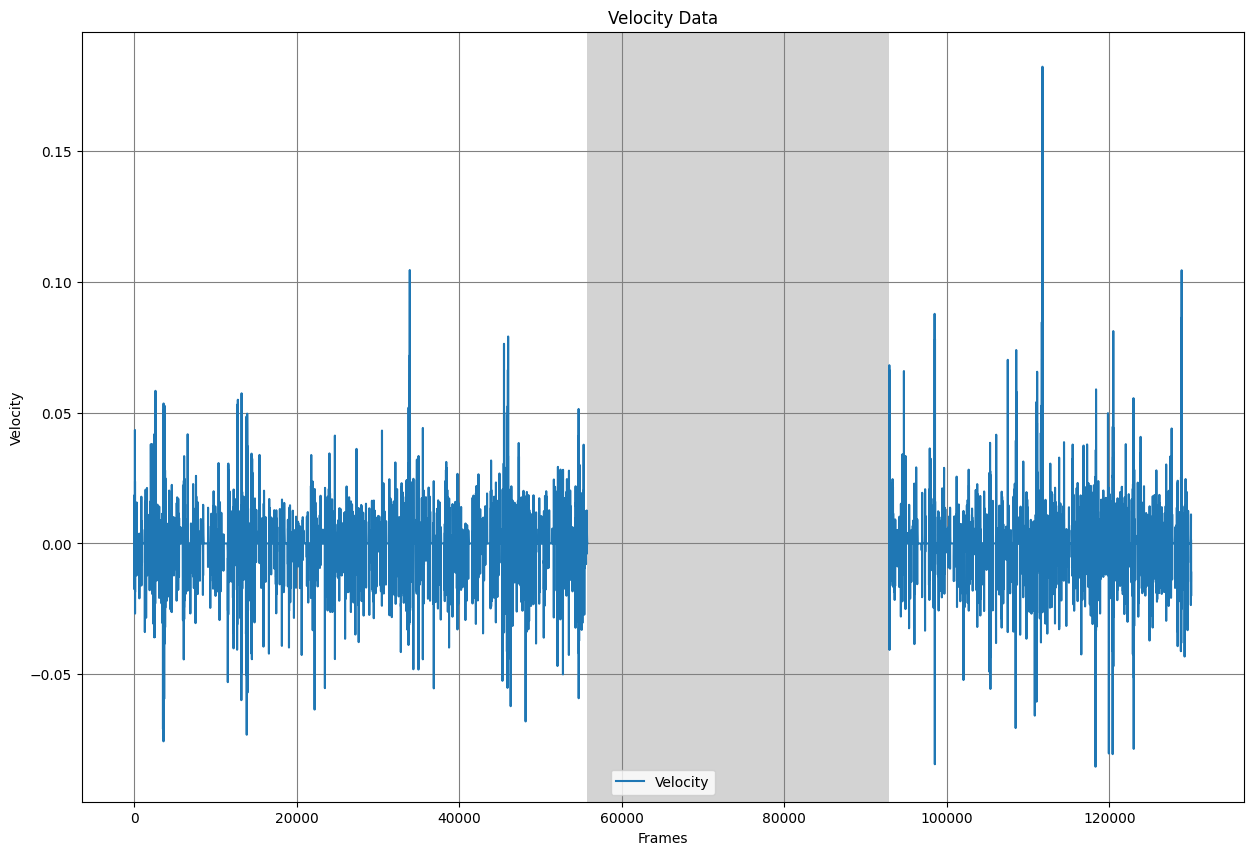

In [109]:
plot_velocity(velocity, is_wheel=is_wheel) 

False 55740
True 92901


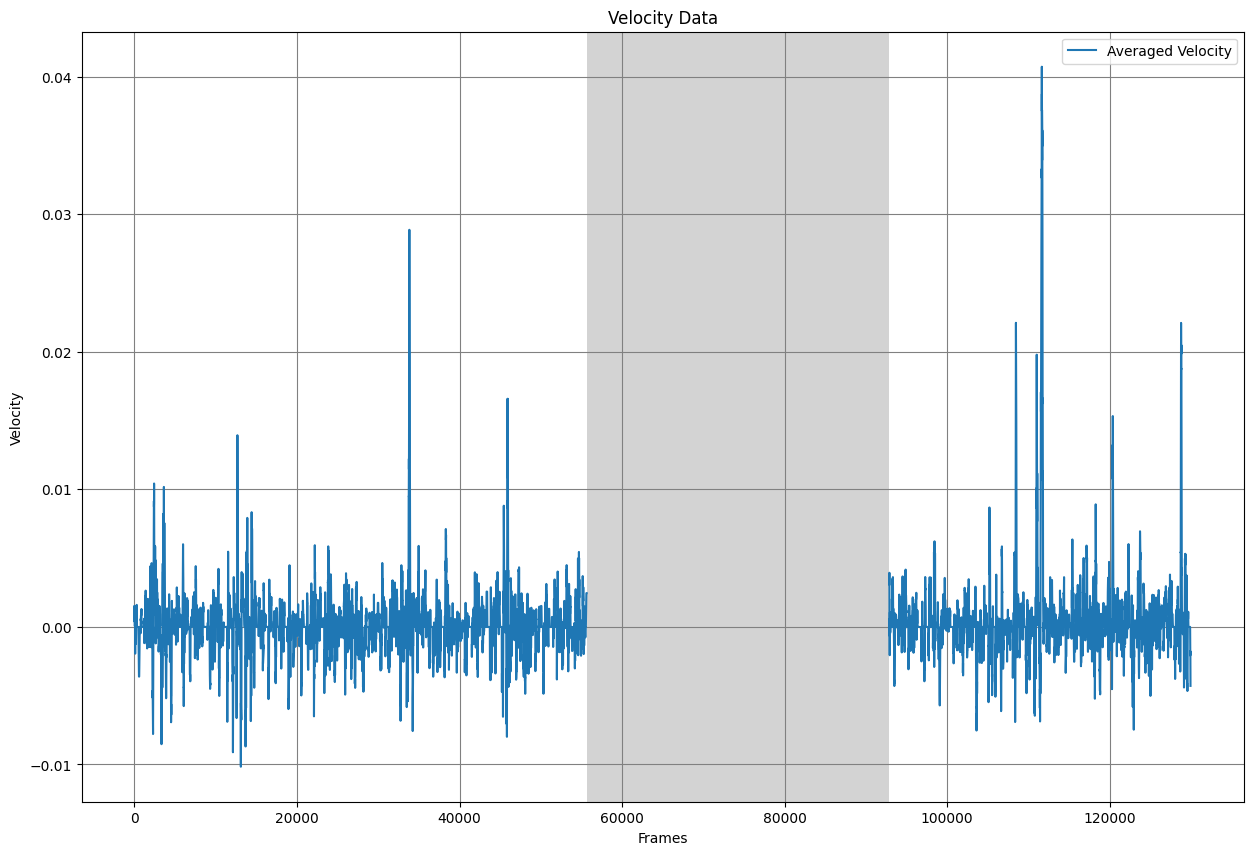

In [7]:
plot_velocity(velocity, average=True, window_size=100, is_wheel=is_wheel)

### Stat (**cell position** and contours)

C:\Users\mauls\AppData\Local\Temp\ipykernel_21452\603673981.py:414: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.cell_contours = np.array(contours)


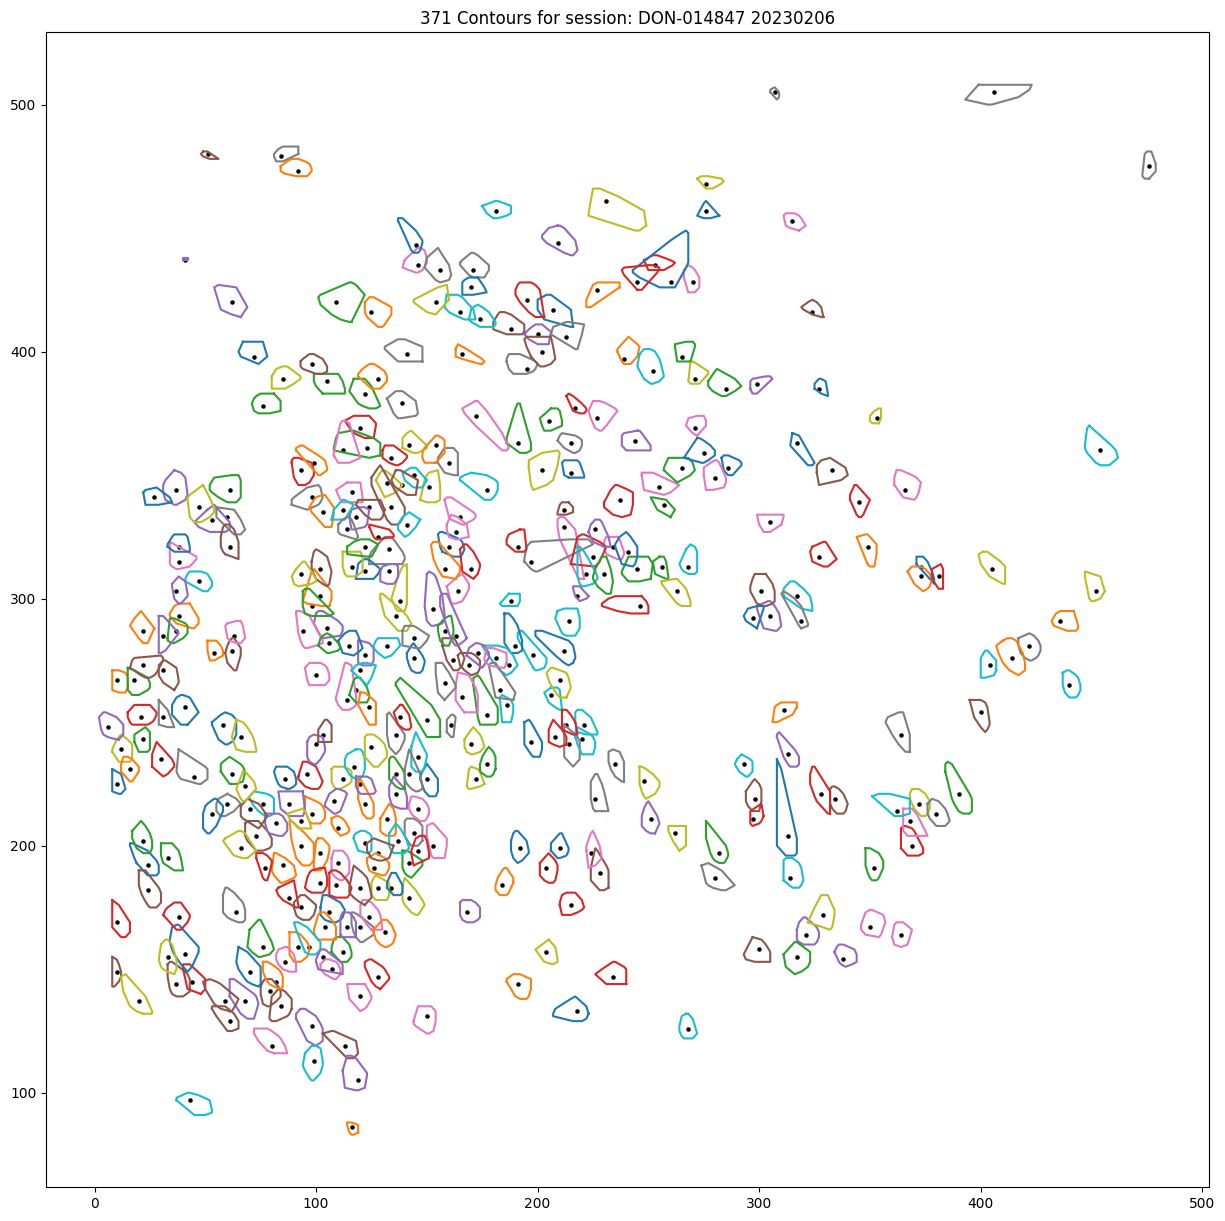

In [4]:
root_dir = r"D:\SwitchDrive\Gallegolab\Animal_binarization_20231130"
Animal.root_dir = root_dir
wanted_animal_ids = ["DON-014847"]
animals = load_all(root_dir, wanted_animal_ids=wanted_animal_ids, wanted_session_ids=["all"], print_loading=False)
session = animals["DON-014847"].sessions["20230206"]
plot_contours(session=session, clean=True)

#stat = session.load_stat() stat file is loaded automatically in the following functions 
cell_centers = session.get_cell_centers(clean=True)
cell_contours = session.get_cell_contours(clean=True)
#plot_contours(cell_contours, cell_centers)


# testing 
removing sessions with either geldrying cell not correct or velocity frames

In [14]:
#animals = load_all(root_dir, wanted_animal_ids=mice23, wanted_session_ids=["all"], print_loading=True)
root_dir = r"D:\SwitchDrive\Gallegolab\Animal_binarization_20231130"
Animal.root_dir = root_dir
animals = load_all(root_dir, wanted_animal_ids=["all"], wanted_session_ids=["all"], print_loading=False)

In [20]:
delete_session_list = [["DON-002865", ["20210215", "20210219"]],
                        ["DON-009191", ["20220303"]],
                        ["DON-009192", ["20220215", "20220218"]],
                        ["DON-014838", ["20230130", "20230201"]],
                        ["DON-014840", ["20230304", "20230308", "20230312", "20230320"]],
                        ["DON-014847", ["20230206", "20230209"]],
                        ["DON-014849", ["20230222"]]]

for animal_id, session_list in delete_session_list:
    for session_id in session_list:
        session = animals[animal_id].sessions[session_id]
        print(session.session_dir)
        try:
            shutil.rmtree(session.session_dir)
        except:
            print(f"path not present")

D:\SwitchDrive\Gallegolab\Animal_binarization_20231130\DON-002865\20210215
path not present
D:\SwitchDrive\Gallegolab\Animal_binarization_20231130\DON-002865\20210219
path not present
D:\SwitchDrive\Gallegolab\Animal_binarization_20231130\DON-009191\20220303
D:\SwitchDrive\Gallegolab\Animal_binarization_20231130\DON-009192\20220215
D:\SwitchDrive\Gallegolab\Animal_binarization_20231130\DON-009192\20220218
D:\SwitchDrive\Gallegolab\Animal_binarization_20231130\DON-014838\20230130
D:\SwitchDrive\Gallegolab\Animal_binarization_20231130\DON-014838\20230201
D:\SwitchDrive\Gallegolab\Animal_binarization_20231130\DON-014840\20230304
D:\SwitchDrive\Gallegolab\Animal_binarization_20231130\DON-014840\20230308
D:\SwitchDrive\Gallegolab\Animal_binarization_20231130\DON-014840\20230312
D:\SwitchDrive\Gallegolab\Animal_binarization_20231130\DON-014840\20230320
D:\SwitchDrive\Gallegolab\Animal_binarization_20231130\DON-014847\20230206
D:\SwitchDrive\Gallegolab\Animal_binarization_20231130\DON-014847\

In [15]:
#DON-014840
for animal_id, animal in animals.items():
        if animal_id in skip:
            continue
        #print(animal.dob)
        print(animal.animal_id)
        for session_id, session in animal.sessions.items():
            #fps = session.load_fps()
            #date = session.date
            pday = session.pday
            F_detrended, F_upphase = session.load_fluoresence()
            cell_drying = session.load_cell_drying()
            velocity = session.load_velocity()
            num_cell_matching_text = "" if F_detrended.shape[0]==cell_drying.shape[0] else f"{F_detrended.shape[0]}!={cell_drying.shape[0]}"
            if isinstance(velocity, np.ndarray):
                if len(velocity.shape)>0:
                    num_frames_matching_text = "" if F_detrended.shape[1]==velocity.shape[0] else f"{F_detrended.shape[1]}!={velocity.shape[0]}"
                else:
                    num_frames_matching_text = "velocity data not found"
            else:
                num_frames_matching_text = "Velocity file not present"
            print(session_id, pday, num_cell_matching_text, num_frames_matching_text)

DON-010473
20220513 18  
20220514 19  
20220519 24  
20220520 25  
20220521 26  
20220522 27  
20220523 28  
20220524 29  
20220525 30  
20220530 35  
DON-010477
20220510 15  
20220511 16  
20220512 17  
20220513 18  
20220514 19  
20220519 24  
20220520 25  
20220521 26  
20220522 27  
20220523 28  
20220524 29  
20220525 30  
DON-014837
20230127 16  
20230128 17  
20230129 18  
20230130 19  
20230131 20  
20230202 22  
20230203 23  
20230204 24  
20230205 25  
20230207 27  
20230208 28  
20230209 29  
20230212 32  
20230213 33  
20230214 34  
20230215 35  
20230217 37  
20230223 43  
DON-015078
20230212 16  
20230213 17  
20230214 18  
20230215 19  
20230216 20  
20230217 21  
20230218 22  
20230219 23  
20230220 24  
20230221 25  
20230222 26  
20230223 27  
20230224 28  
20230225 29  
20230226 30  
20230227 31  
20230228 32  
20230301 33  
20230302 34  
20230303 35  
20230304 36  
20230306 38  
20230307 39  
20230308 40  
20230309 41  
20230310 42  
20230311 43  
20230312 44  
2023